In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML PROJECTS/House Price Final/ParisHousing.csv')

In [ ]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
df['cityCode'].value_counts()
#From the output we can see that the city code does not have any impact on the pricing of the house for this dataset as all the cities are mostly different. So, we will remove this column.

,count
cityCode,
97260,3
95054,3
82521,3
56356,3
39297,3
...,...
90146,1
9439,1
36609,1


In [ ]:
df['cityPartRange'].value_counts()


,count
cityPartRange,
8,1035
5,1031
10,1004
4,1001
3,999
9,997
1,994
2,990
7,984


In [ ]:
df['made'].value_counts()


,count
made,
1992,356
2013,352
2020,336
2018,334
2003,332
2001,332
1996,327
1991,324
2009,324


In [ ]:
df.drop(columns = ['hasYard', 'hasPool', 'cityCode', 'cityPartRange', 'made', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom', 'hasGuestRoom'], axis =1, inplace = True)

In [ ]:
df.head()

,squareMeters,numberOfRooms,floors,numPrevOwners,basement,attic,garage,price
0,75523,3,63,8,4313,9005,956,7559081.5
1,80771,39,98,6,3653,2436,128,8085989.5
2,55712,58,19,8,2937,8852,135,5574642.1
3,32316,47,6,4,659,7141,359,3232561.2
4,70429,19,90,7,8435,2429,292,7055052.0


In [ ]:
df.isnull().sum()

,0
squareMeters,0
numberOfRooms,0
floors,0
numPrevOwners,0
basement,0
attic,0
garage,0
price,0


In [ ]:
#Only dealing with numberical features now

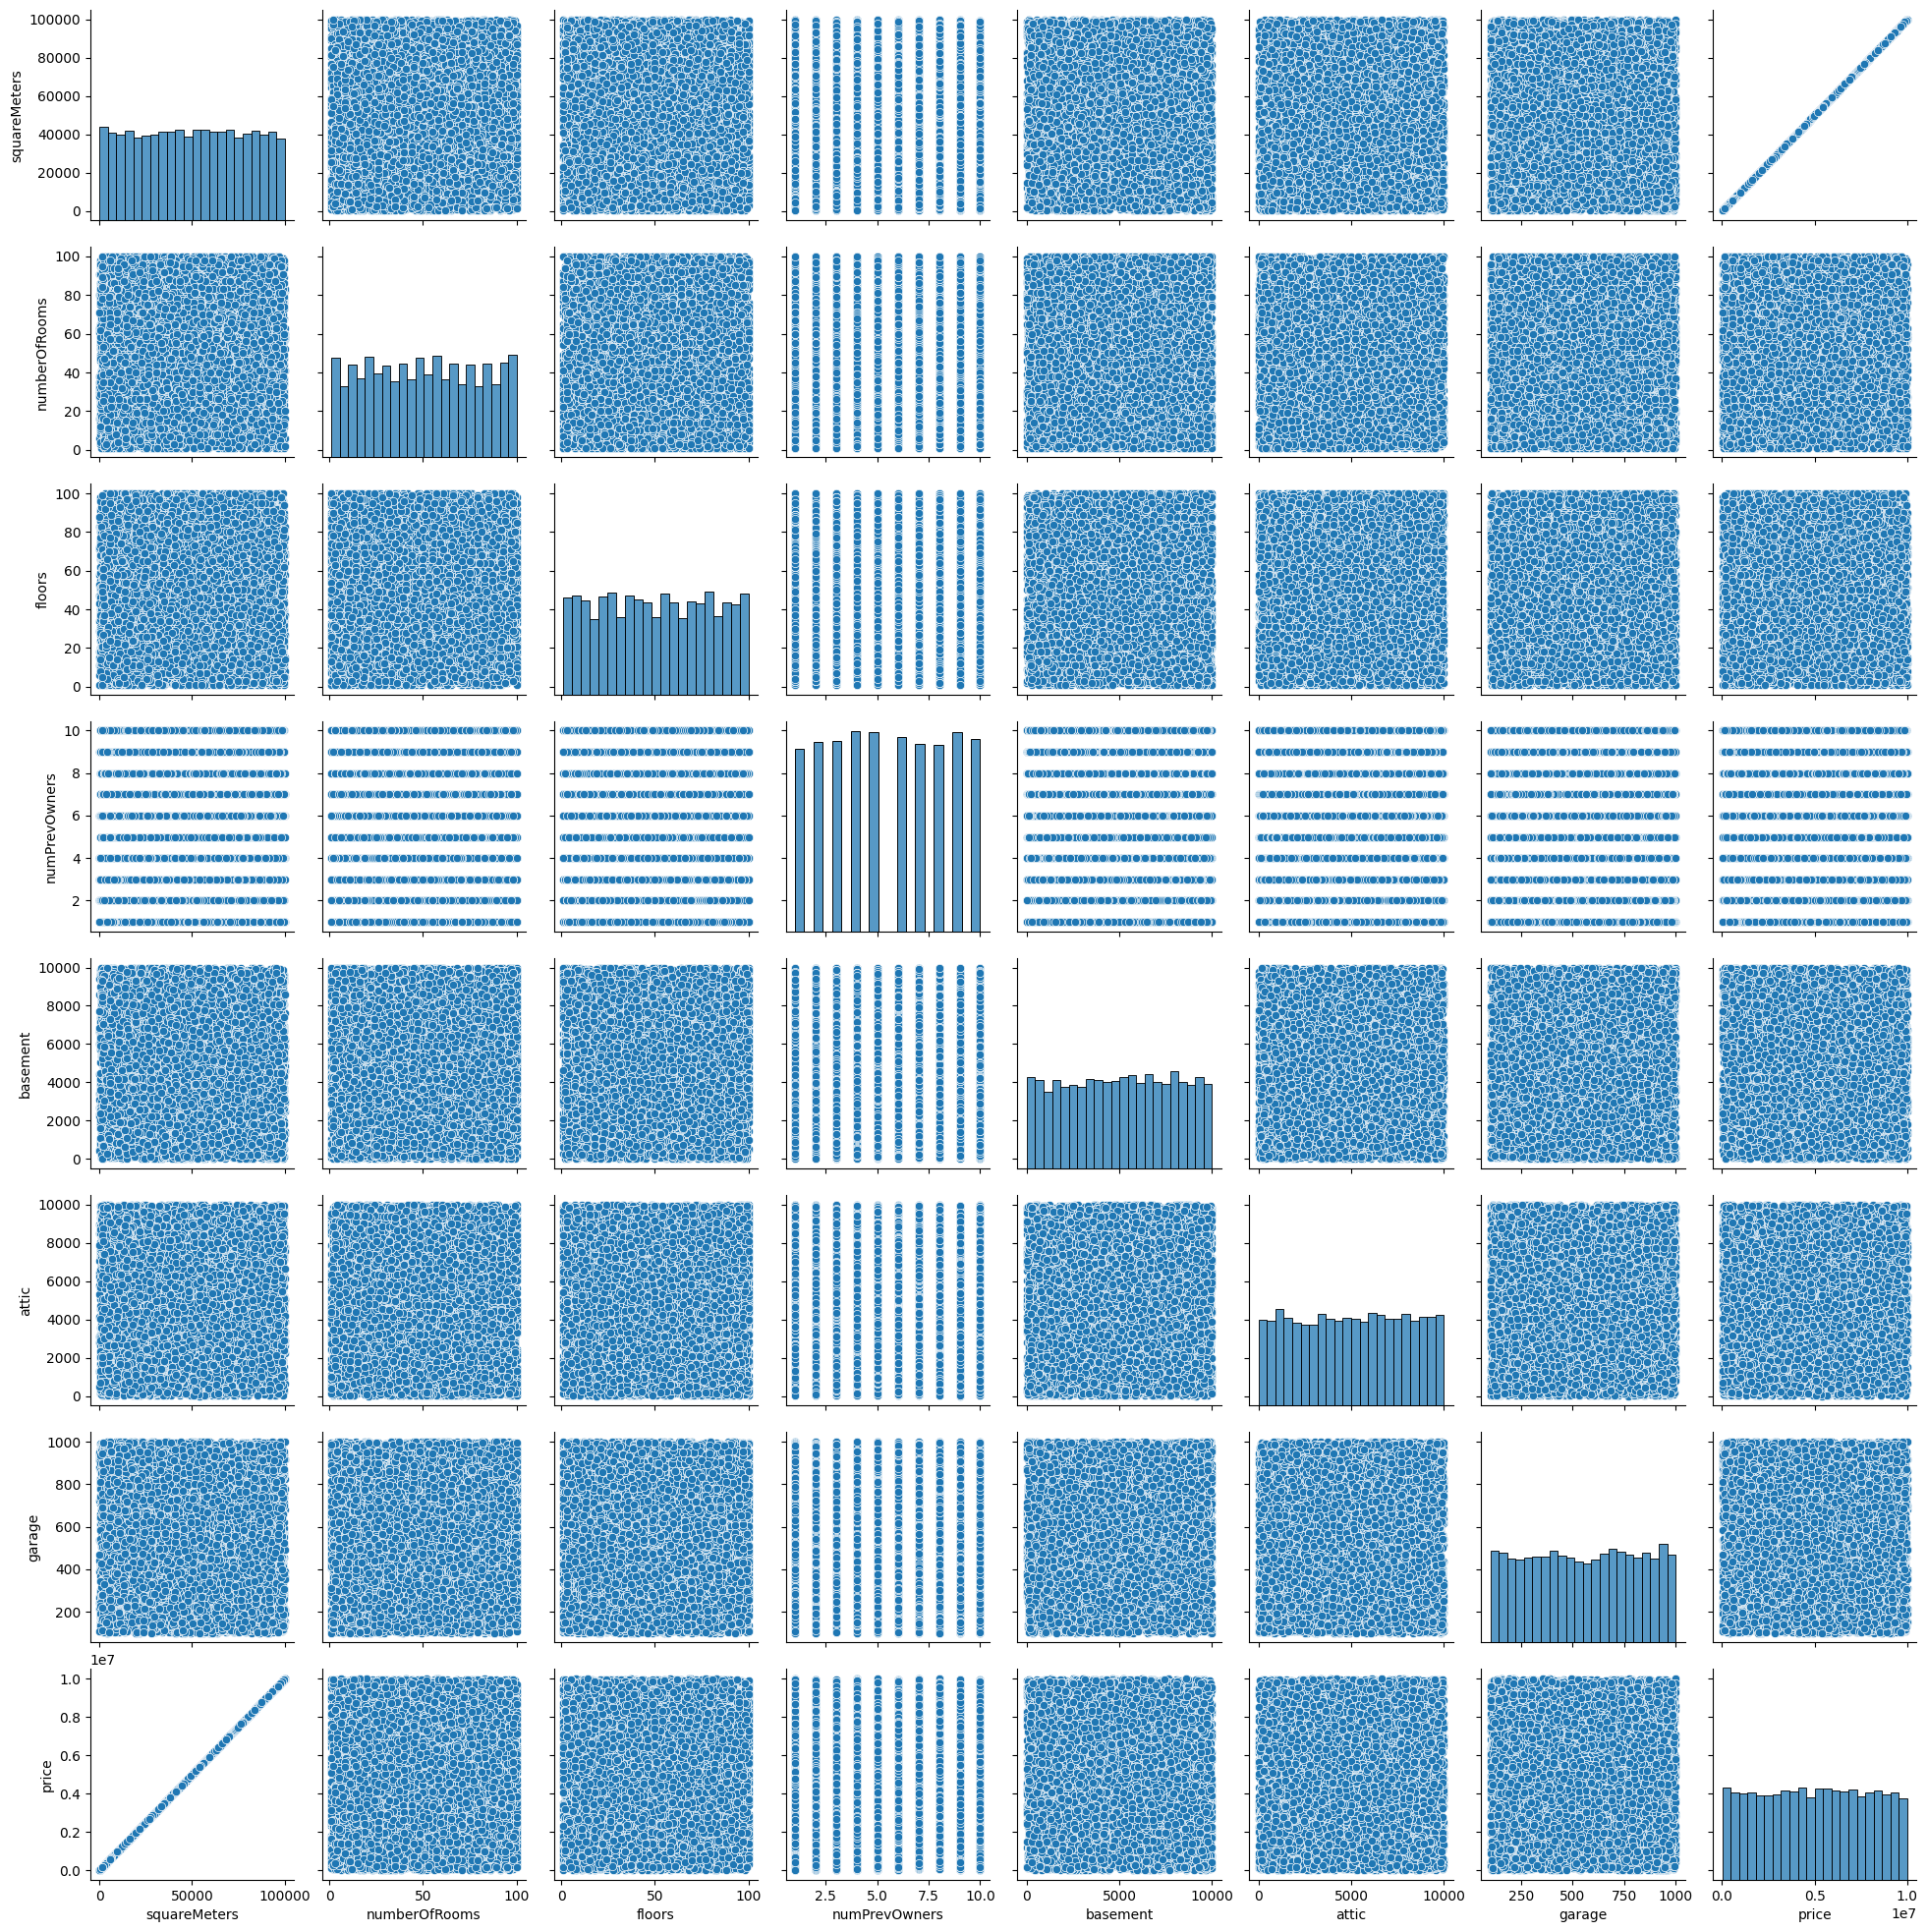

In [ ]:
import seaborn as sns
sns.pairplot(df)

Text(0, 0.5, ' House Price ')

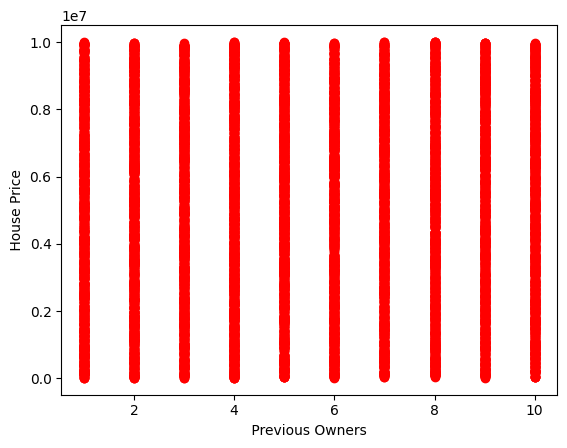

In [ ]:
plt.scatter(df['numPrevOwners'], df['price'], color = 'r')
plt.xlabel(" Previous Owners ")
plt.ylabel(" House Price ")

In [ ]:
df.corr()

,squareMeters,numberOfRooms,floors,numPrevOwners,basement,attic,garage,price
squareMeters,1.000000,0.009573,0.001109,0.016619,-0.003960,-0.000588,-0.017246,0.999999
numberOfRooms,0.009573,1.000000,0.022244,0.016766,-0.013990,0.012061,0.023188,0.009591
floors,0.001109,0.022244,1.000000,0.002463,0.006228,-0.000270,0.011303,0.001654
numPrevOwners,0.016619,0.016766,0.002463,1.000000,-0.000862,0.000719,0.020268,0.016619
basement,-0.003960,-0.013990,0.006228,-0.000862,1.000000,-0.003180,0.000117,-0.003967
attic,-0.000588,0.012061,-0.000270,0.000719,-0.003180,1.000000,-0.000611,-0.000600
garage,-0.017246,0.023188,0.011303,0.020268,0.000117,-0.000611,1.000000,-0.017229
price,0.999999,0.009591,0.001654,0.016619,-0.003967,-0.000600,-0.017229,1.000000


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X

,squareMeters,numberOfRooms,floors,numPrevOwners,basement,attic,garage
0,75523,3,63,8,4313,9005,956
1,80771,39,98,6,3653,2436,128
2,55712,58,19,8,2937,8852,135
3,32316,47,6,4,659,7141,359
4,70429,19,90,7,8435,2429,292
...,...,...,...,...,...,...,...
9995,1726,89,5,6,9311,1698,218
9996,44403,29,12,4,9061,1742,230
9997,83841,3,69,10,8304,7730,345
9998,59036,70,96,3,2590,6174,339


In [ ]:
y

,price
0,7559081.5
1,8085989.5
2,5574642.1
3,3232561.2
4,7055052.0
...,...
9995,176425.9
9996,4448474.0
9997,8390030.5
9998,5905107.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =42)

<Axes: xlabel='floors', ylabel='price'>

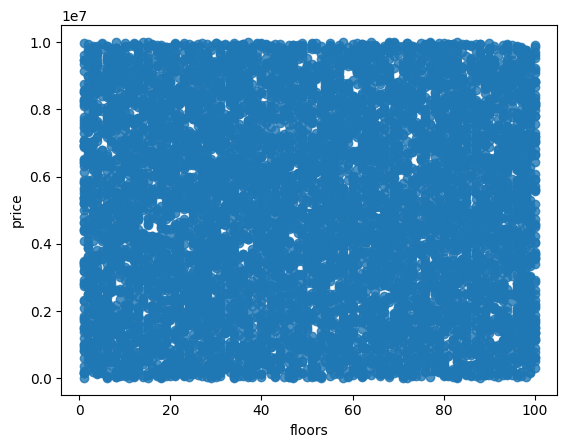

In [ ]:
sns.regplot(x ='floors', y = 'price', data = df)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[-0.12567865, -0.61005493,  1.13138816, ...,  1.558512  ,
         1.10645488,  1.66619525],
       [-0.93041666, -0.33229219,  0.71682022, ..., -1.22202009,
         1.30730094,  0.47498348],
       [ 0.67779845,  1.64676731,  1.47686145, ...,  1.0513775 ,
         0.28377838, -0.84603983],
       ...,
       [ 1.72102275,  0.60515705, -0.35414697, ..., -0.57068663,
         0.81913821, -1.10566291],
       [-1.13909654, -0.15869048, -0.25050498, ...,  0.49861483,
         0.6927051 , -0.77731608],
       [-1.60850369,  1.16068252,  0.78591487, ..., -0.01339597,
         0.72371049,  1.00950158]])

In [ ]:
X_test

array([[ 0.97896005, -1.48098864,  0.37084668, ..., -0.55729144,
         0.8875728 ,  1.26777485],
       [-0.46628155,  1.01494278,  1.27637011, ...,  0.23299437,
         1.1012929 , -1.54022061],
       [ 1.18034728, -0.47568293, -0.22122634, ...,  0.59252948,
         0.34368479,  0.48947176],
       ...,
       [-1.54234153,  0.77228278, -1.26606108, ...,  0.69555012,
        -1.33434919, -1.55929667],
       [-0.79350606, -0.09436007, -0.18639852, ...,  1.2763376 ,
        -0.3706912 , -1.10147132],
       [ 0.31318873, -0.75300864, -1.12674978, ...,  1.1753912 ,
         0.7561332 , -1.28841667]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error',
                                   cv = 5)

In [ ]:
np.mean(validation_score)

-8215142.986784858

In [ ]:
#prediction
y_pred = regression.predict(X_test)
y_pred

array([7759235.63179948, 3634408.39029295, 8333300.85463647, ...,
        558314.18858874, 2697894.99762189, 5855988.53542902])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

21547651019.992756
122129.47172939008
146791.18168334485


In [ ]:
score = r2_score(y_test, y_pred)
score


0.9975090484794993

In [ ]:
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.9975020514246664


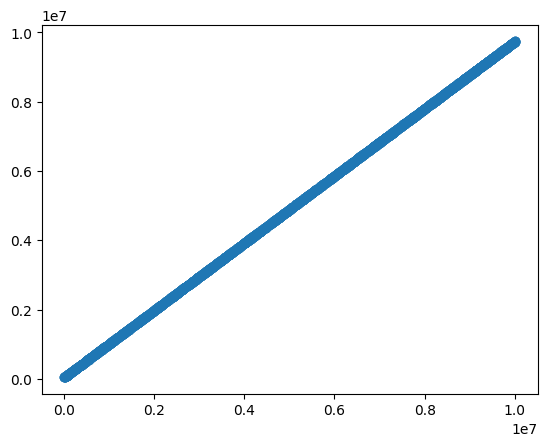

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
residuals = y_test - y_pred
print(residuals)

6252    205133.968201
4684     79140.509707
1731    219718.345364
4742    159289.742171
4521    161921.413751
            ...      
4862    120728.110626
7025    186126.998194
7647    -16913.988589
7161     46867.002378
73      144837.564571
Name: price, Length: 2500, dtype: float64


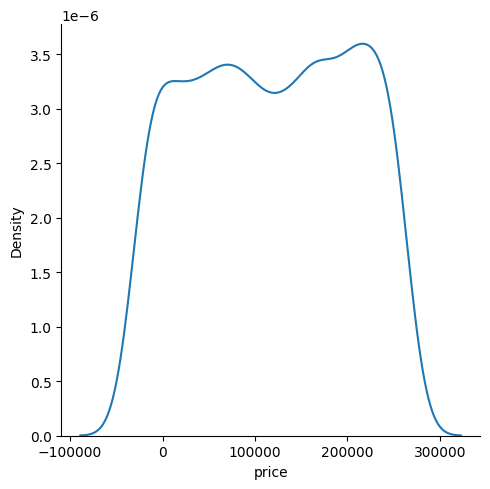

In [ ]:
sns.displot(residuals, kind ='kde')

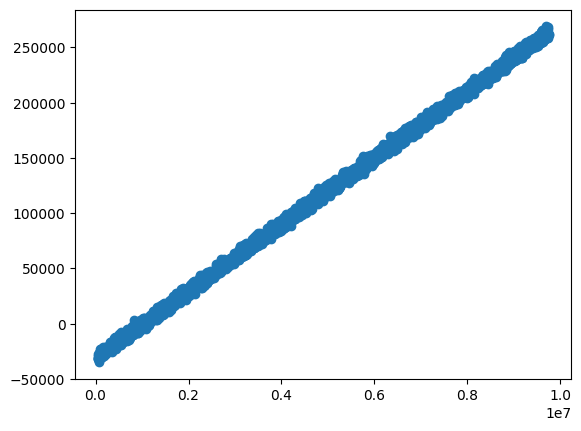

In [ ]:
plt.scatter(y_pred, residuals)

In [ ]:
print(regression.coef_)

[ 2.85505481e+06  3.23100802e+01  1.58578367e+03  4.98685254e+00
 -2.08870670e+01 -6.44612467e+01  2.54139732e+01]
